<a href="https://colab.research.google.com/github/madhumitafilos/Collab/blob/main/Another_copy_of_Madhumita_LinearRegression_Intermediate_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression**

---



**1.Import required libraries**

In [ ]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

import math

# to split data to training and validation dataset
from sklearn.model_selection import train_test_split

# linear regression model
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn import metrics

#Creation of Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

#Advanced statistics of the linear regression model
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant

#Outlier analysis
from scipy.stats import zscore

#Random forest
from sklearn.ensemble import RandomForestRegressor

#XGBoost
from xgboost import XGBClassifier

#Accuracy score
from sklearn.metrics import accuracy_score

#Label encoder for XG Boost
from sklearn.preprocessing import LabelEncoder

from sklearn.neural_network import MLPRegressor



**2.Read/Extract data**

In [ ]:
wind_DS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
wind_DS.head()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,2013-01-01 00:00:00,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,...,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,2013-01-01 00:10:00,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,...,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,2013-01-01 00:20:00,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,...,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,2013-01-01 00:30:00,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,...,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,2013-01-01 00:40:00,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,...,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


In [ ]:
wind_DS.tail()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
208905,4.41,2016-12-31 03:30:00,0.27,8.18,185.73,14.45,3.23,3.84,3.53,201.25000,...,3.80,9.229999,16.059999,-4.75,1035.0,93.0,1.54,0.0,0.0,0.0
208906,-1.57,2016-12-31 03:40:00,0.50,4.45,185.73,14.83,2.56,3.54,3.05,204.89000,...,3.83,9.229999,16.360001,-4.75,1035.0,93.0,1.54,0.0,0.0,0.0
208907,-6.99,2016-12-31 03:50:00,0.50,4.17,185.73,15.17,1.61,3.57,2.59,198.53000,...,3.65,9.229999,16.610001,-4.75,1035.0,93.0,1.54,0.0,0.0,0.0
208908,-11.20,2016-12-31 04:00:00,0.50,6.32,185.73,15.54,1.16,3.53,2.34,197.36000,...,3.60,9.229999,16.830000,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
208909,-2.06,2016-12-31 04:10:00,0.50,2.38,185.73,16.02,0.17,3.43,1.80,192.57001,...,3.63,9.229999,17.020000,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0


In [ ]:
wind_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208910 entries, 0 to 208909
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   active_power            208910 non-null  float64
 1   timestamp               208910 non-null  object 
 2   pitch_angle             208910 non-null  float64
 3   reactive_power          208910 non-null  float64
 4   nacelle_angle           208910 non-null  float64
 5   nacelle_temp            208910 non-null  float64
 6   wind_speed1             208910 non-null  float64
 7   wind_speed2             208910 non-null  float64
 8   wind_speed_avg          208910 non-null  float64
 9   wind_angle              208910 non-null  float64
 10  vane_angle              208910 non-null  float64
 11  outdoor_temp            208910 non-null  float64
 12  rotor_angular_velocity  208910 non-null  float64
 13  rotor_bearing_temp      208910 non-null  float64
 14  weather_temp        

In [ ]:
wind_DS.describe()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
count,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.00000,208910.000000,208910.000000,208910.000000,208910.000000
mean,333.816039,10.598804,31.602240,181.410901,25.247184,5.245032,5.309963,5.277553,179.518056,0.214923,12.165809,10.363781,26.975262,10.860165,1016.981739,79.06385,3.460041,170.338730,0.060069,0.001185
std,427.064175,23.263701,31.392095,96.000942,6.371956,2.606739,2.478537,2.535224,95.235185,24.305192,7.542306,5.578950,5.256221,7.475077,8.296634,18.04730,2.132537,100.778006,0.299763,0.031198
min,-18.490000,-121.260000,-165.550000,0.030000,1.560000,0.000000,0.000000,0.000000,0.000000,-179.950000,-6.320000,0.000000,4.600000,-9.310000,976.000000,14.00000,0.130000,0.000000,0.000000,0.000000
25%,24.459999,-0.990000,9.600000,100.120000,21.219999,3.790000,3.930000,3.860000,98.542502,-5.930000,6.220000,9.229999,24.280001,5.150000,1012.000000,68.00000,2.060000,80.000000,0.000000,0.000000
50%,170.530000,-0.990000,26.850000,197.810000,25.770000,5.290000,5.350000,5.320000,194.600010,-0.140000,11.810000,11.250000,27.500000,10.420000,1017.000000,86.00000,3.090000,190.000000,0.000000,0.000000
75%,467.130000,0.500000,40.610001,251.590000,29.730000,6.620000,6.640000,6.630000,248.100010,6.100000,17.400000,14.860000,30.400000,15.970000,1022.000000,93.00000,4.630000,240.000000,0.000000,0.000000
max,2051.120100,119.070000,241.700000,359.959990,42.849998,21.280001,19.990000,20.570000,360.000000,180.000000,37.779999,17.219999,41.049999,35.940000,1044.000000,100.00000,19.030000,360.000000,8.060000,2.080000



Negative values in Active Power have no practical meaning in wind power generation.These values represent time stamps when turbine blades do not rotate, but the turbine’s control system needs electricity. These values need to be eliminated along with the corresponding parameters of the same timestamp for better forecasting results. Since the elimination of these negative values disrupts the time continuity of the time-series, and can possibly lead to errors in wind power prediction, at this stage it was decided to create and assess three types of datasets based on different actions against negative values.
These three preprocessing methods against the negative values are:
* Total elimination of negative values without any substitution;
* Replacement of negative values with the average amount of power in the whole 4-month period;
* Replacement of negative values with positive values of power at the nearest timestamp.

In [ ]:
print("Count of negative values in active power column")
wind_DS.active_power.lt (0).sum()

Count of negative values in active power column


39235

Total elimination of negative values without any substitution

In [ ]:
wind_DS['active_power'] = wind_DS['active_power'].where(wind_DS['active_power'] >= 0,pd.NA)
wind_DS = wind_DS.dropna()

Replace all negative active power with mean active power values - This was not effective for the predictions since there were 39235 records for which the negative value got replaced with mean value. It lead to inaccuracy in the training data.

In [ ]:

wind_DS['active_power'] = wind_DS['active_power'].where(wind_DS['active_power'] >= 0,wind_DS['active_power'].mean())

In [ ]:
wind_DS.active_power.lt (0).sum()

0

In [ ]:
wind_DS.isnull().sum()

active_power              0
timestamp                 0
pitch_angle               0
reactive_power            0
nacelle_angle             0
nacelle_temp              0
wind_speed1               0
wind_speed2               0
wind_speed_avg            0
wind_angle                0
vane_angle                0
outdoor_temp              0
rotor_angular_velocity    0
rotor_bearing_temp        0
weather_temp              0
pressure                  0
humidity                  0
weather_wind_speed        0
weather_wind_angle        0
rain_1h                   0
snow_1h                   0
dtype: int64

So there are no null values in the data.

In [ ]:
wind_DS.describe()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
count,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.00000,208910.000000,208910.000000,208910.000000,208910.000000
mean,396.702712,10.598804,31.602240,181.410901,25.247184,5.245032,5.309963,5.277553,179.518056,0.214923,12.165809,10.363781,26.975262,10.860165,1016.981739,79.06385,3.460041,170.338730,0.060069,0.001185
std,396.700284,23.263701,31.392095,96.000942,6.371956,2.606739,2.478537,2.535224,95.235185,24.305192,7.542306,5.578950,5.256221,7.475077,8.296634,18.04730,2.132537,100.778006,0.299763,0.031198
min,0.000000,-121.260000,-165.550000,0.030000,1.560000,0.000000,0.000000,0.000000,0.000000,-179.950000,-6.320000,0.000000,4.600000,-9.310000,976.000000,14.00000,0.130000,0.000000,0.000000,0.000000
25%,127.350000,-0.990000,9.600000,100.120000,21.219999,3.790000,3.930000,3.860000,98.542502,-5.930000,6.220000,9.229999,24.280001,5.150000,1012.000000,68.00000,2.060000,80.000000,0.000000,0.000000
50%,333.816039,-0.990000,26.850000,197.810000,25.770000,5.290000,5.350000,5.320000,194.600010,-0.140000,11.810000,11.250000,27.500000,10.420000,1017.000000,86.00000,3.090000,190.000000,0.000000,0.000000
75%,467.130000,0.500000,40.610001,251.590000,29.730000,6.620000,6.640000,6.630000,248.100010,6.100000,17.400000,14.860000,30.400000,15.970000,1022.000000,93.00000,4.630000,240.000000,0.000000,0.000000
max,2051.120100,119.070000,241.700000,359.959990,42.849998,21.280001,19.990000,20.570000,360.000000,180.000000,37.779999,17.219999,41.049999,35.940000,1044.000000,100.00000,19.030000,360.000000,8.060000,2.080000


Time sereis graph for active power by timestamp

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/training_data.csv',usecols=['active_power', 'timestamp'])
data['timestamp'] = pd.to_datetime(data['timestamp'])
filtered_data = data.loc[data['timestamp'].dt.year < 2014]
data.set_index('timestamp', inplace=True)

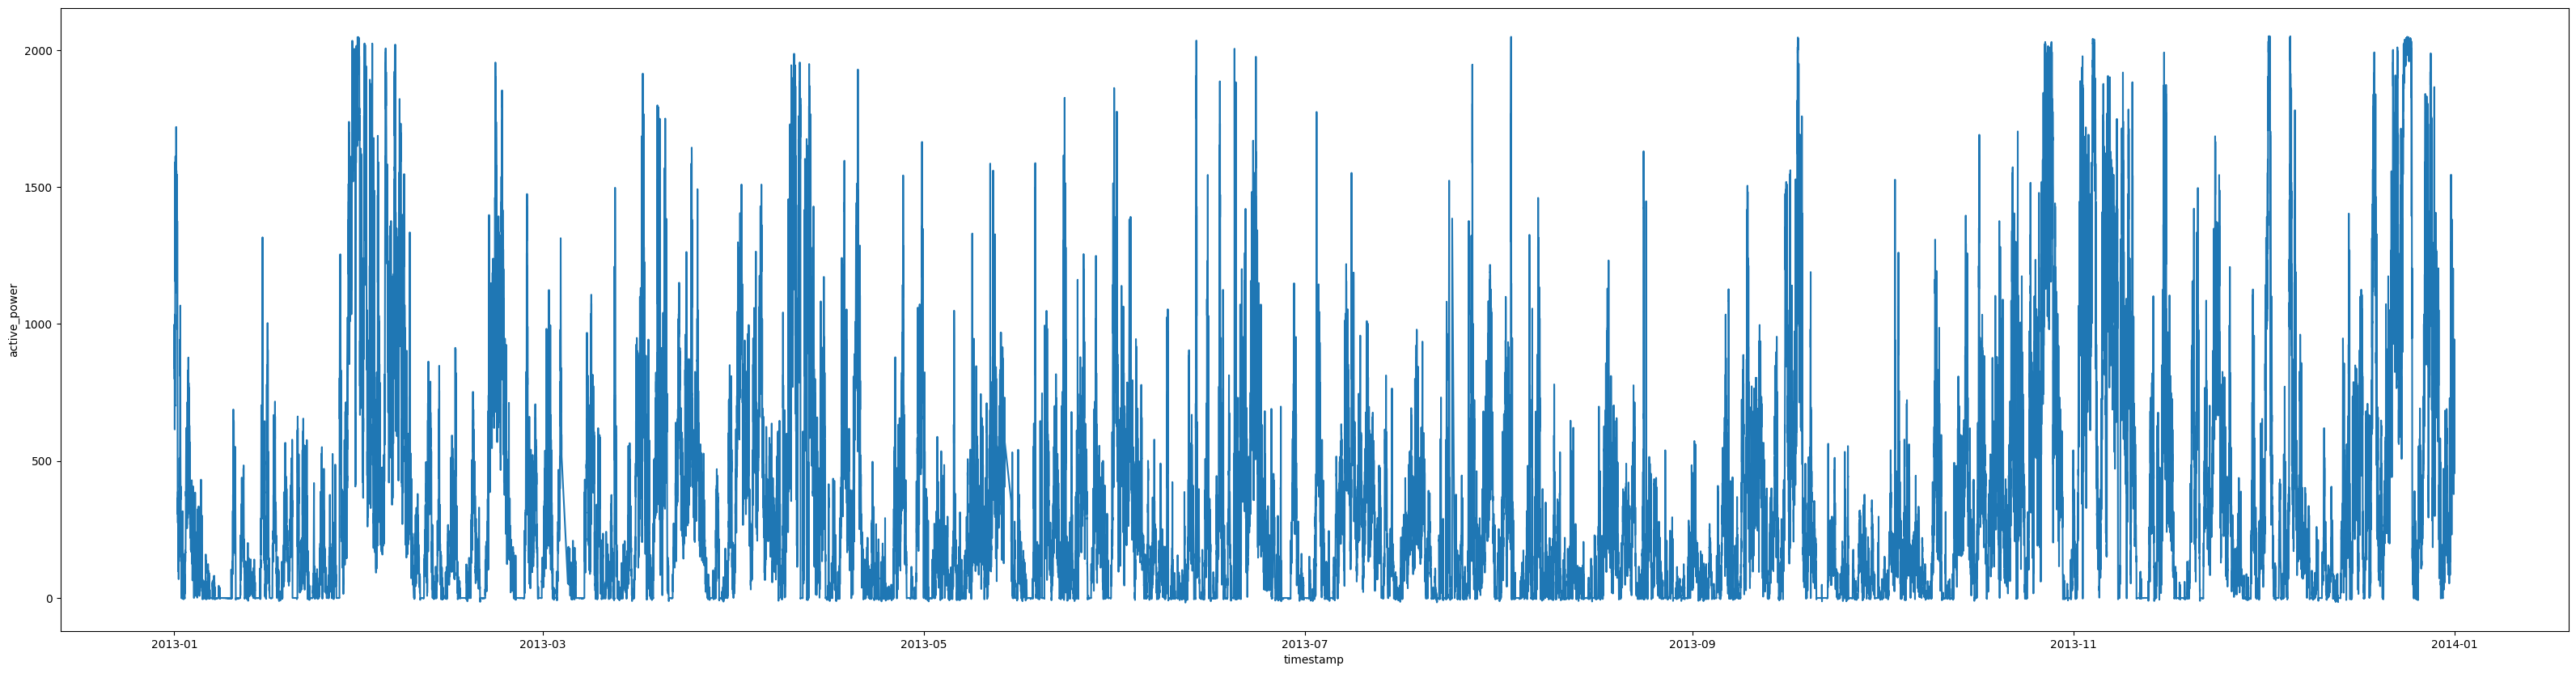

In [ ]:
plt.figure(figsize=(40, 10))
sns.lineplot(x=filtered_data['timestamp'], y=filtered_data['active_power'], data=data)
plt.show()

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/training_data.csv',usecols=['active_power', 'timestamp'])

# Convert the timestamp column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208910 entries, 0 to 208909
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   active_power  208910 non-null  float64       
 1   timestamp     208910 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 MB


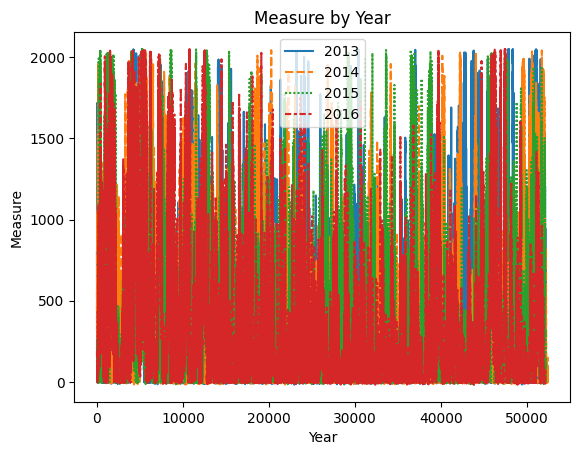

<Figure size 15000x4000 with 0 Axes>

In [ ]:
# Group the data by year
groups = data.groupby(data['timestamp'].dt.year)

# Create a line plot for each year
years = {}
for name, group in groups:
    years[name] = group['active_power'].values

sns.lineplot(data=years)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Measure')

# Set the title
plt.title('Measure by Year')

# Show the plot
plt.figure(figsize=(150, 40))
plt.show()

**Perform Exploratory Data Analysis**

Check the years for which data is available

In [ ]:
wind_DS['timestamp'] = pd.to_datetime(wind_DS['timestamp'])
years = list({i for i in wind_DS['timestamp'].dt.year})
print(years)

[2016, 2013, 2014, 2015]


Extract year, month , hour and minutes from timestamp as new columns

In [ ]:
wind_DS['Year'] = wind_DS['timestamp'].dt.year
wind_DS['Month'] = wind_DS['timestamp'].dt.month
wind_DS['Day'] = wind_DS['timestamp'].dt.day
wind_DS['Hour'] = wind_DS['timestamp'].dt.hour
wind_DS['Minute'] = wind_DS['timestamp'].dt.minute
wind_DS.tail()


,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h,Year,Month,Hour,Minute,Day
208905,4.410000,2016-12-31 03:30:00,0.27,8.18,185.73,14.45,3.23,3.84,3.53,201.25000,...,93.0,1.54,0.0,0.0,0.0,2016,12,3,30,31
208906,333.816039,2016-12-31 03:40:00,0.50,4.45,185.73,14.83,2.56,3.54,3.05,204.89000,...,93.0,1.54,0.0,0.0,0.0,2016,12,3,40,31
208907,333.816039,2016-12-31 03:50:00,0.50,4.17,185.73,15.17,1.61,3.57,2.59,198.53000,...,93.0,1.54,0.0,0.0,0.0,2016,12,3,50,31
208908,333.816039,2016-12-31 04:00:00,0.50,6.32,185.73,15.54,1.16,3.53,2.34,197.36000,...,93.0,1.03,0.0,0.0,0.0,2016,12,4,0,31
208909,333.816039,2016-12-31 04:10:00,0.50,2.38,185.73,16.02,0.17,3.43,1.80,192.57001,...,93.0,1.03,0.0,0.0,0.0,2016,12,4,10,31


Distribution of target variable

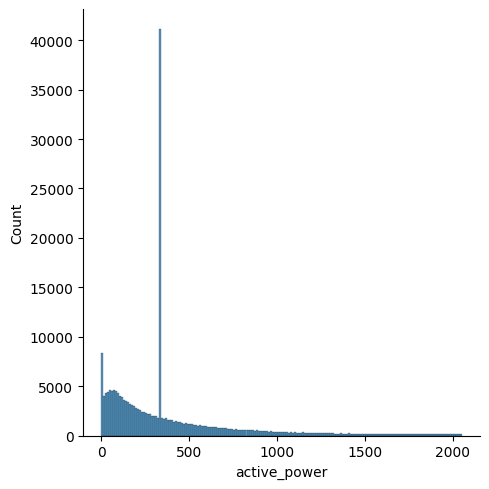

In [ ]:
sns.displot(wind_DS['active_power'])

Observation : The target active_power is normally distributed. We can see lot of data with 0 values.

Create Heatmap to analyse data

<ipython-input-32-8263680f71d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wind_DS.corr(),annot=True,cmap="coolwarm")


Text(0.5, 1.0, 'Wind Turbine Active Power Heatmap')

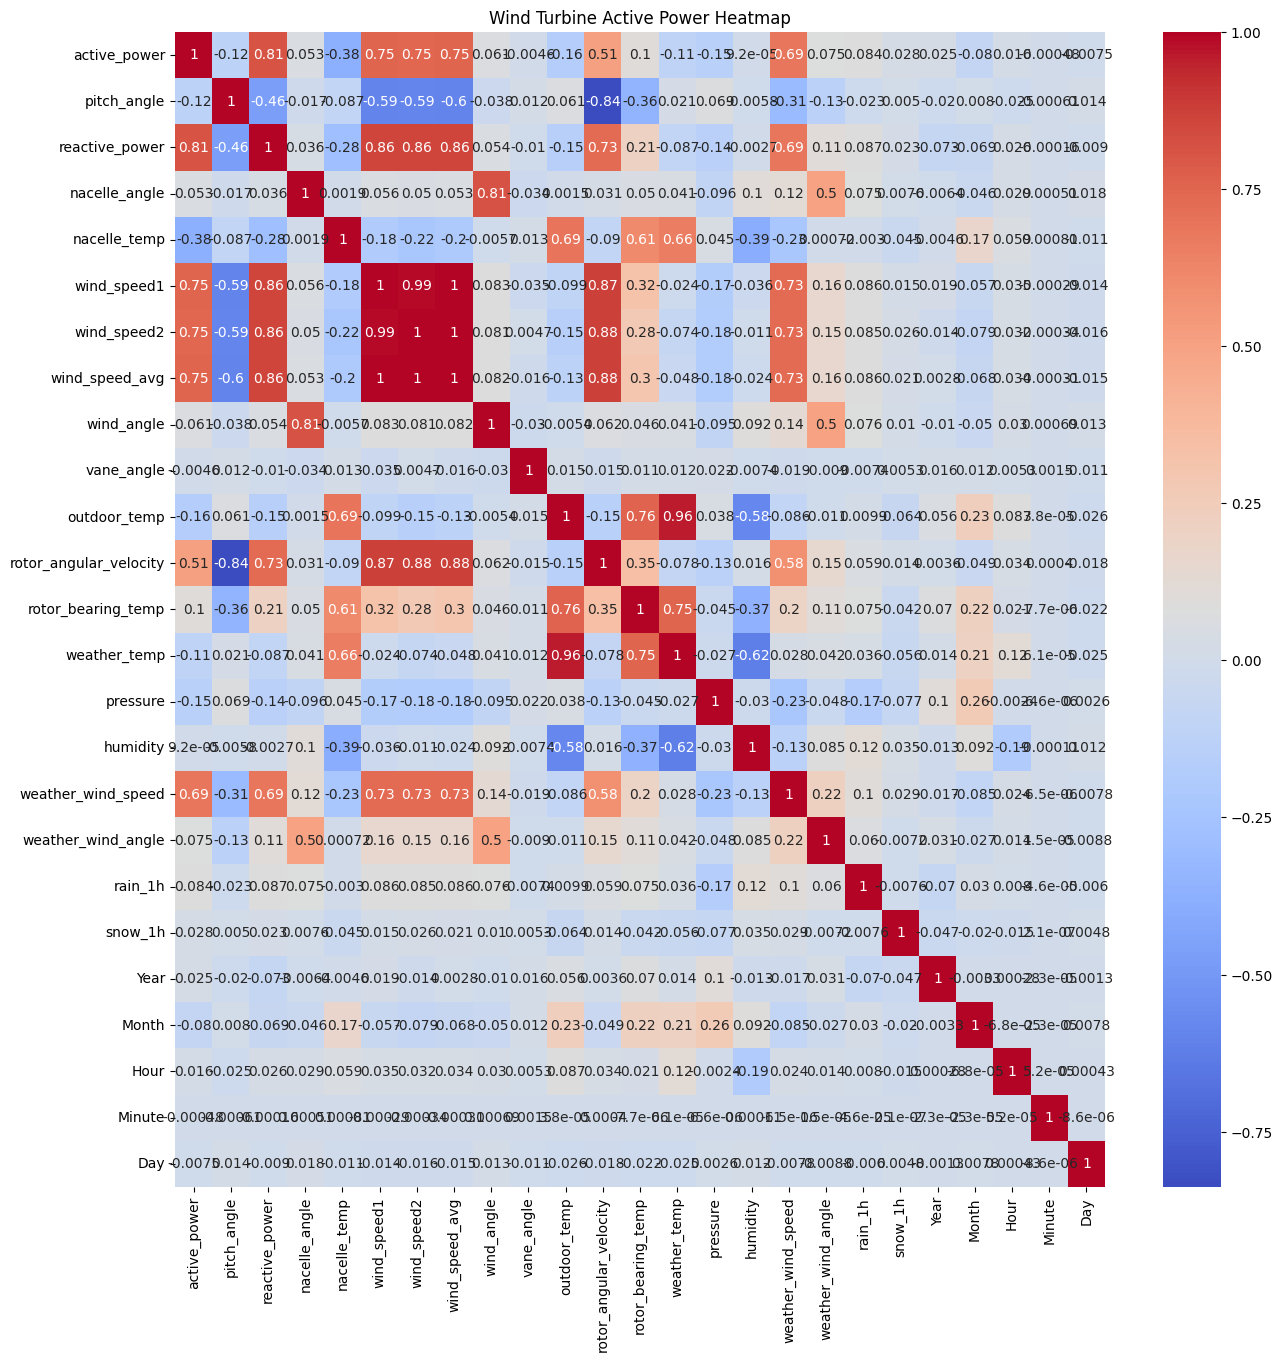

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(wind_DS.corr(),annot=True,cmap="coolwarm")
plt.title('Wind Turbine Active Power Heatmap')

**3.Defining feature X and target Y**


*   A subset of features were considered based on the analysis of the heat map



In [ ]:
X = wind_DS[['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']]
#X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
y = wind_DS['active_power']



**4.Dividing data into training and vaidation data set**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)

**5.Implementing the linear regression**

In [ ]:
wind_lr = LinearRegression()
wind_lr.fit(train_X,train_y)
wind_lm = OLS(train_y, train_X).fit()

**6.Prediction on the test set**

In [ ]:
#Prediction of test set
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
test_data_X = test_data[['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']]
#Predicting the actual_power for the test data set
y_test_data_predict = wind_lm.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: 0       -105.245004
1        -66.654513
2       -130.301422
3       -153.652715
4        -96.722041
            ...    
52223    123.378456
52224    -51.287688
52225    -24.657698
52226    201.118805
52227    197.139131
Length: 52228, dtype: float64


7.Creation of submission dataset

In [ ]:
submission_MX = pd.DataFrame(data=y_test_data_predict, columns=["active_power"])
submission_MX.reset_index(inplace=True)
submission_MX = submission_MX.rename(columns = {'index':'id'})
submission_MX.head()

,id,active_power
0,0,-105.245004
1,1,-66.654513
2,2,-130.301422
3,3,-153.652715
4,4,-96.722041


**8.Creation of the csv file for submission**

In [ ]:
submission_MX.to_csv("active_power_submission.csv", index=False)

**9.Actual value vs Predicted value for the training data set**

In [ ]:
y_predict = wind_lm.predict(test_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_predict))
wind_lr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_lr_dif.head()

Prediction of test set: 186813     336.285844
45433     1586.272006
64742      188.042294
151113     211.507042
24054       46.668478
             ...     
159293     230.284858
78013      277.842182
186370     130.589321
144587      -4.901947
182990     472.570549
Length: 62673, dtype: float64


,Actual value,Predicted value
186813,188.280000,336.285844
45433,1790.060100,1586.272006
64742,97.010002,188.042294
151113,156.500000,211.507042
24054,0.000000,46.668478


**10.Metrics**

In [ ]:
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
#For more detailed summary of the model using statmodel
print(wind_lm.summary())


R squared: 82.63
Mean Absolute Error: 125.22299958886278
Mean Square Error: 27374.64680750051
Root Mean Square Error: 165.4528537303014
                                 OLS Regression Results                                
Dep. Variable:           active_power   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          8.102e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:26:38   Log-Likelihood:                     -9.5443e+05
No. Observations:              146237   AIC:                                  1.909e+06
Df Residuals:                  146218   BIC:                                  1.909e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                   

Observation : We can see that the Squared error value is too high and we will need to reduce it further with an alternative approach.

Multi Layer Regression

In [ ]:
wind_mlr =  MLPRegressor(
    hidden_layer_sizes=(2*test_X.shape[1],),
    activation='relu',
    max_iter=1000,
    learning_rate_init=0.1,
    #verbose=True,
    random_state=99)
wind_mlr.fit(train_X, train_y)

Residual Analysis

<Figure size 800x600 with 0 Axes>

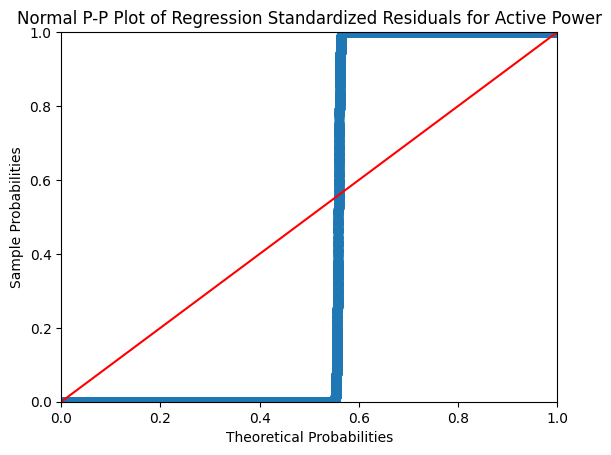

In [ ]:
wind_lm_resid = wind_lm.resid
wind_lm_probplot = sm.ProbPlot(wind_lm_resid)
plt.figure(figsize=(8,6))
wind_lm_probplot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardized Residuals for Active Power')
plt.show()

Observation: The residuals are not normally distributed.

Test of Homoscedasticity

Text(0, 0.5, 'Standardized residuals')

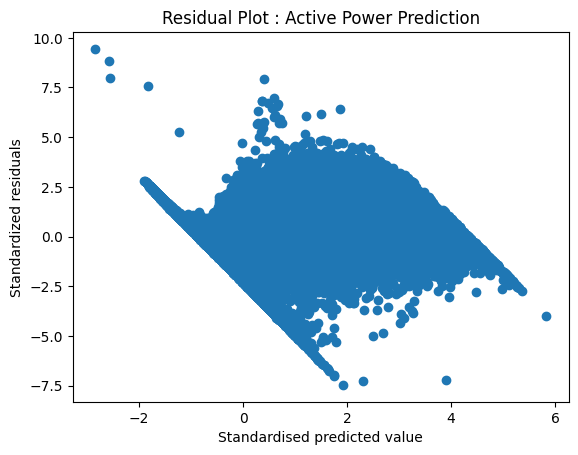

In [ ]:
def get_standardized_values(vals): return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(wind_lm.fittedvalues), get_standardized_values(wind_lm_resid))
plt.title('Residual Plot : Active Power Prediction')
plt.xlabel('Standardised predicted value')
plt.ylabel('Standardized residuals')

Observation : The residuals do not have a constant variance across different values of the predicted value. So there is heteroscedasticity.

Outlier analysis

In [ ]:
#Find zscore
wind_DS['z_score_active_power'] = zscore(wind_DS.active_power)
wind_DS[(wind_DS.z_score_active_power > 3.0) | (wind_DS.z_score_active_power < -3.0)]


,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h,z_score_active_power
43,1719.0699,2013-01-01 07:10:00,0.98,129.630000,290.390010,19.889999,11.32,11.50,11.41,291.700010,...,17.160000,26.420000,5.88,1009.0,93.0,8.23,200.0,1.1,0.0,3.243675
44,1638.0800,2013-01-01 07:20:00,0.27,133.600010,290.390010,14.770000,10.94,11.12,11.03,292.420010,...,17.150000,26.379999,5.88,1009.0,93.0,8.23,200.0,1.1,0.0,3.054031
4021,1699.3600,2013-01-28 22:20:00,0.03,136.570010,292.590000,16.330000,10.59,10.74,10.67,292.810000,...,17.150000,25.629999,4.61,1019.0,81.0,9.77,200.0,0.0,0.0,3.197522
4024,1684.3199,2013-01-28 22:50:00,0.05,150.970000,292.590000,11.670000,10.84,11.15,11.00,297.470000,...,17.150000,25.299999,4.61,1019.0,81.0,9.77,200.0,0.0,0.0,3.162305
4025,1619.0400,2013-01-28 23:00:00,0.07,151.770000,292.590000,11.900000,10.52,10.81,10.67,296.820010,...,17.150000,25.440001,4.62,1020.0,81.0,8.75,200.0,0.0,0.0,3.009447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204273,1958.5100,2016-11-28 23:30:00,3.04,153.480000,47.439999,5.940000,12.00,11.84,11.92,51.029999,...,17.180000,22.469999,-0.63,1025.0,64.0,8.23,90.0,0.0,0.0,3.804341
204274,1908.7200,2016-11-28 23:40:00,3.05,146.630000,47.439999,5.880000,12.00,11.76,11.88,49.549999,...,17.170000,22.590000,-0.63,1025.0,64.0,8.23,90.0,0.0,0.0,3.687754
204275,1659.3800,2016-11-28 23:50:00,0.07,128.910000,47.439999,5.360000,10.65,10.41,10.53,48.139999,...,17.150000,22.590000,-0.63,1025.0,64.0,8.23,90.0,0.0,0.0,3.103906
204280,1631.9399,2016-11-29 00:40:00,-0.04,123.640000,47.439999,12.970000,10.74,10.37,10.56,43.779999,...,17.150000,22.639999,-1.31,1025.0,64.0,6.69,90.0,0.0,0.0,3.039653


Observation : There are a lot of Outliers in the dataset.

Text(0.5, 1.0, 'Box Plot of Active Power')

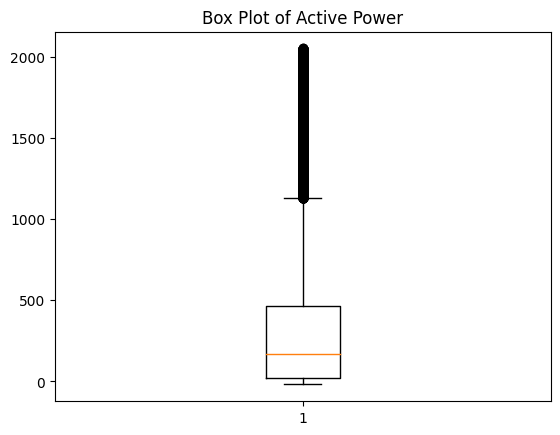

In [ ]:
plt.boxplot(wind_DS['active_power'])
plt.title('Box Plot of Active Power')

Observation : The boxplot above shows a lot of outliers in the data in bold black color.

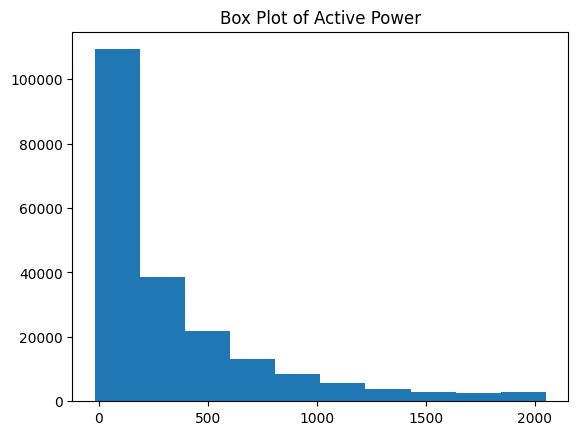

In [ ]:
plt.hist(wind_DS['active_power'])
plt.title('Box Plot of Active Power')
plt.show()

Observation: The Histogram above also has a lot of outliers in the range of 1500 to 2000.

Clipping method : To remove outliers - Negative result: The score decreased and the error increased.

In [ ]:
percentiles = wind_DS['active_power'].quantile([0.01,0.99]).values
wind_DS['active_power'] = np.clip(wind_DS['active_power'],percentiles[0],percentiles[1])
X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
y = wind_DS['active_power']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)
wind_lr = LinearRegression()
wind_lr.fit(train_X,train_y)
y_predict = wind_lm.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_lr.score(X,y)


R squared: 89.92
Mean Absolute Error: 113.102811098832
Mean Square Error: 21500.276315025683
Root Mean Square Error: 146.62972520954162


0.899210154430253

**Random forest regressor**

In [ ]:
wind_RF= RandomForestRegressor(n_estimators=100, random_state=0)
wind_RF.fit(X,y)

RandomForestRegressor(random_state=0)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_predict = wind_RF.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_RF.score(X,y)

R squared: 90.09
Mean Absolute Error: 0.009796348347567454
Mean Square Error: 0.0004502001977076696
Root Mean Square Error: 0.021217921616116638


0.999542327917965

In [ ]:
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_predict))
wind_regr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_regr_dif.head()

Prediction of test set: [-0.33322331  3.41777001 -0.55099971 ... -0.78358537 -0.78353549
  0.20758723]


,Actual value,Predicted value
0,-0.340783,-0.333223
1,3.409895,3.417770
2,-0.554498,-0.551000
3,-0.415198,-0.418037
4,-0.781653,-0.781665


In [ ]:
#Prediction of test set
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
test_data_X = test_data[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
#Predicting the actual_power for the test data set
y_test_data_predict = wind_RF.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: [2.58368842 3.51499412 2.64296475 ... 2.58584172 1.62023578 2.58693921]


In [ ]:
submission_MX = pd.DataFrame(data=y_test_data_predict, columns=["active_power"])
submission_MX.reset_index(inplace=True)
submission_MX = submission_MX.rename(columns = {'index':'id'})
submission_MX.head()

,id,active_power
0,0,2.583688
1,1,3.514994
2,2,2.642965
3,3,2.729304
4,4,3.444744


In [ ]:
submission_MX.to_csv("active_power_submission_v4.csv", index=False)

XG Boost algorithm

In [ ]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)
wind_XG = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', device='gpu', device_ordinal=0) #eta = 0.01,gamma = 10

In [ ]:
wind_XG.fit(train_X,train_y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "device_ordinal", "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoostError: ignored

Not possible to execute XGBoost with available GPU as the required memory capacity is too high.

Score on training set

In [ ]:
wind_XG.fit(train_X,train_y)
y_predict = wind_XG.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_XG.score(X,y)

Gradient Descent algorithm

Standardise X and Y

In [ ]:
y = np.array((y - y.mean())/y.std())
X = X.apply(lambda rec: (rec-rec.mean()) / rec.std(), axis = 0)

Random initialisation of the bias and weights

In [ ]:
import random
#dim - number of weights to be initialised besides the bias
def initialize (dim):
  np.random.seed(seed=42)
  random.seed(42)
  #Initialise the bias
  b = random.random()
  #Initialise the weights
  w = np.random.rand(dim)
  return b,w

Initialising the bias and weights for the 5 input variables

In [ ]:
b, w = initialize( 5 )
print("Bias: ", b, "Weights: ", w)

Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


Predict Y values from the Bias and Weights

In [ ]:
#Inputs:
#b - bias
#w - weights
#X - the input matrix

def predict_y(b, w, X):
  return b + np.matmul(X,w)

Calculate predicted values after initializing Bias and Weights

In [ ]:
b, w = initialize( 5 )
y_hat = predict_y(b, w, X)
y_hat[0:10]


0    1.695873
1    2.089360
2    2.353340
3    2.502944
4    2.518792
5    2.288543
6    1.737339
7    1.425551
8    2.066893
9    2.165631
dtype: float64

Calculate the Cost function

In [ ]:
import math

# y - Actual value of y
# y_hat - predicted value of y
def get_cost( y, y_hat ):
  # Calculating the residuals - difference between actual and predicted values
  y_resid = y - y_hat
  #Matrix multiplication with self will give the square values
  #Then take the sum and divide by number of examples to calculate mean
  return np.sum(np.matmul(y_resid.T, y_resid)) / len(y_resid)

In [ ]:
b, w = initialize(5)
y_hat = predict_y(b,w,X)
get_cost(y, y_hat)

1.1812970068395927

Update the Bias and Weights
x, y - the input and output variables
y_hat - predicted value with current bias and weights
b_0, w_0 - current bias and weights
learning_rate - learning rate to adjust the update step

In [ ]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate) :
  #gradient of bias
  db = (np.sum(y_hat - y)*2)/len(y)
  #gradient of weights
  dw = (np.dot((y_hat - y), x)*2) / len(y)
  #update bias
  b_1 = b_0 - learning_rate * db
  #update beta
  w_1 = w_0 - learning_rate * dw
  #return the new bias and beta values
  return b_1, w_1

In [ ]:
#learning parameter used is 0.01
b, w = initialize(5)
print ("After initialization - Bias: ",b, "Weights: ",w)
y_hat = predict_y(b,w,X)
b, w = update_beta(X,y,y_hat,b,w,0.01)
print("After first update - Bias: ", b, "Weights: ",w)

After initialization - Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
After first update - Bias:  0.6266382624887261 Weights:  [0.37963377 0.94467767 0.71912447 0.59273625 0.15052541]


# **Neural networks**

In [ ]:
# Imports
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
#X = wind_DS[['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']]
X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
#X = wind_DS[['wind_speed_avg']]
y = wind_DS['active_power']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)

KNN Imputer for missing data

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
XImp = imputer.fit_transform(X)

In [ ]:

# Scale network input data.
scaler = preprocessing.StandardScaler()
Xn = scaler.fit_transform(XImp)

# Scale test set.
Xtn = scaler.fit_transform(test_X)  #apply scaling to test data

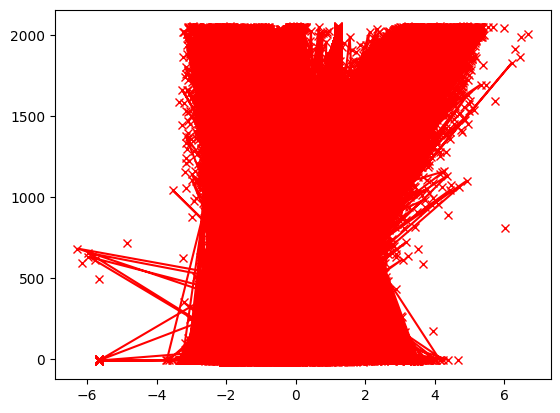

In [ ]:
# Plot data.
plt.figure()
plt.plot(Xtn, test_y, 'r')
plt.plot(Xn, y, 'rx')

Train without hidden layers - Simple perceptron model

In [ ]:
from sklearn.neural_network import MLPRegressor as mlp  # Import MLP.

In [ ]:
net = mlp(hidden_layer_sizes=(), activation='tanh', solver='lbfgs', max_iter=2000)
net.fit(Xn, y)
predictions = net.predict(Xtn)

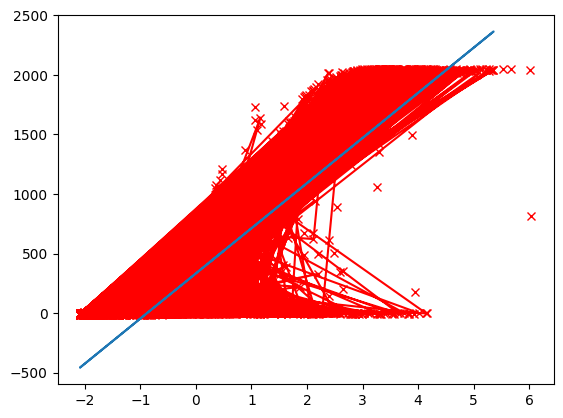

In [ ]:
plt.figure()
plt.plot(Xn, y, 'rx')  # Plot training data.
plt.plot(Xtn, test_y, 'r')  # Plot target function.
plt.plot(Xtn, predictions)  # Plot learnt function.

Adding hidden layers

In [ ]:
# Hidden units to try.
#numhidden = [1, 2, 5, 10, 15, 20]

# Results on test set / training set.
#restest = np.zeros(len(numhidden))
#restrain = np.zeros(len(numhidden))

# Ideally you would run this multiple times and report average results (or use cross-validation, see later).
#for idx, hidden in enumerate(numhidden):
decays = [0, 0.0001, 0.001, 0.01, 0.1]  #,1,10]
restest = np.zeros(len(decays))
restrain = np.zeros(len(decays))

for idx, decay in enumerate(decays):
    net = mlp(hidden_layer_sizes=(10,), activation='tanh', alpha=decay, solver='lbfgs', max_iter=2000)
    net.fit(Xn, y)
    restest[idx] += net.score(Xtn, test_y)
    restrain[idx] += net.score(Xn, y)

#net = mlp(hidden_layer_sizes=(5,), activation='tanh', solver='lbfgs', max_iter=2000)
#net.fit(Xn, y)
#net.score(Xtn, test_y)
#net.score(Xn, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

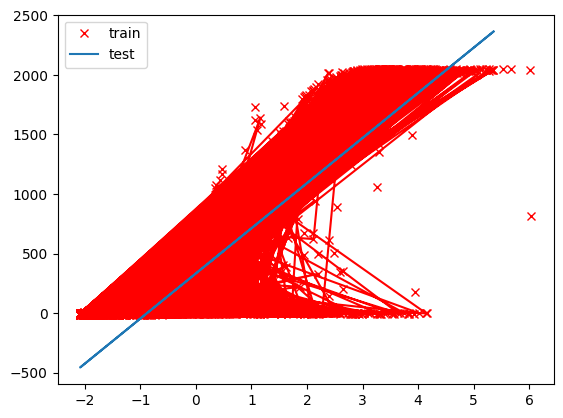

In [ ]:
# Plot performance.
plt.figure()
plt.plot(Xn, y, 'rx',label='train')  # Plot training data.
plt.plot(Xtn, test_y, 'r')  # Plot target function.
plt.plot(Xtn, predictions,label='test')  # Plot learnt function.
plt.legend()
plt.show()

#Predicted values for the test data set

In [ ]:
y_predict = net.predict(Xtn)
print("Prediction of test set: {}".format(y_predict))
wind_net_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_net_dif.head()

Prediction of test set: [2.41980017e+02 1.85575785e+03 7.54754706e+01 ... 8.40907744e+00
 1.69279105e+00 4.58830610e+02]


,Actual value,Predicted value
186813,188.280000,241.980017
45433,1790.060100,1855.757849
64742,97.010002,75.475471
151113,156.500000,156.015513
24054,0.000000,1.903508


#Prediction of test set

In [ ]:
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
test_data_X = test_data[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
#Predicting the actual_power for the test data set
y_test_data_predict = net.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: [751.68985354 751.68985354 751.68985354 ... 456.86900553  88.92436098
  89.53420018]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
submission_MX = pd.DataFrame(data=y_test_data_predict, columns=["active_power"])
submission_MX.reset_index(inplace=True)
submission_MX = submission_MX.rename(columns = {'index':'id'})
submission_MX.head()

,id,active_power
0,0,751.689854
1,1,751.689854
2,2,751.689854
3,3,751.689854
4,4,751.689854


In [ ]:
submission_MX.to_csv("active_power_submission_v8.csv", index=False)

# New section

Increasing the hidden layer size

In [ ]:
# Hidden units to try.
#numhidden = [1, 2, 5, 10, 15, 20]

# Results on test set / training set.
#restest = np.zeros(len(numhidden))
#restrain = np.zeros(len(numhidden))

# Ideally you would run this multiple times and report average results (or use cross-validation, see later).
#for idx, hidden in enumerate(numhidden):
net = mlp(hidden_layer_sizes=(15,), activation='tanh', solver='lbfgs', max_iter=2000)
net.fit(Xn, y)
net.score(Xtn, test_y)
net.score(Xn, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9702956963041721

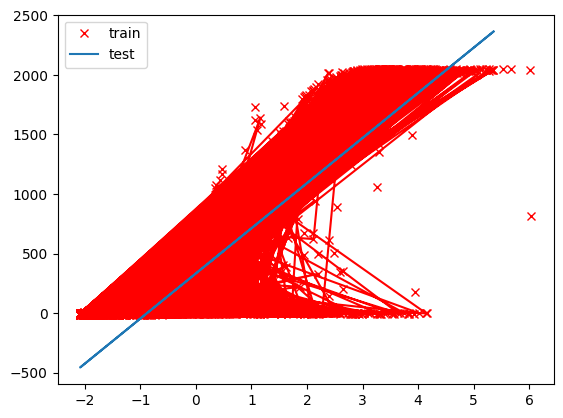

In [ ]:
# Plot performance.
plt.figure()
plt.plot(Xn, y, 'rx',label='train')  # Plot training data.
plt.plot(Xtn, test_y, 'r')  # Plot target function.
plt.plot(Xtn, predictions,label='test')  # Plot learnt function.
plt.legend()
plt.show()